In [99]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import keras.optimizers


In [100]:
data=pd.read_csv("C:/Users/user/Downloads/MailOutput_combined.csv")

In [101]:
data.head()

,Date,Sender,Subject,EmailSize,Status,isSubscription,isEncrypted,isFlagged,AttachmentCount,AttachmentSize,isPrimaryRecipient,NoOfToValues,isCC,NoOfCCValues,isBCC,Topic,ID
0,2022-03-10 09:50:34-08:00,googlecommunityteam-noreply@google.com,"Dmml, finish setting up your new Google Account",81274,True,False,False,False,0,0,True,1,False,0,False,2,A1
1,2022-03-11 06:46:10+11:00,DailyDigest@email.join1440.com,You're in! Here's how 1440 works...,36157,False,True,False,False,0,0,True,1,False,0,False,2,A2
2,2022-03-10 19:49:16+00:00,dave@davenetics.com,Verify Your Email Address for NextDraft,23484,False,False,False,False,0,0,True,1,False,0,False,2,A5
3,2022-03-10 19:50:00+00:00,dave@davenetics.com,NextDraft: Subscription Confirmed,23434,False,False,False,False,0,0,True,1,False,0,False,2,A6
4,2022-03-11 06:51:13+11:00,yo@gettheelevator.com,Welcome to ELEVATOR,29669,False,True,False,False,0,0,True,1,False,0,False,2,A7


(array([  79.,    0.,   87.,    0.,    0., 1709.,    0.,   24.,    0.,
          77.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

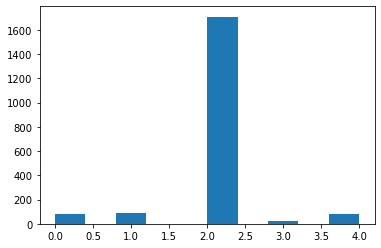

In [102]:
plt.hist(data['Topic'])

In [64]:
data_tfidf=pd.read_csv('C:/Users/user/Downloads/Clustered_emails_topic_tfidf.csv')

In [65]:
data=pd.merge(data.drop('Topic',axis=1),data_tfidf,on="ID")
data.shape

(1976, 18)

In [66]:
data.drop(['Date','Sender','Subject','ID'],axis=1,inplace=True)

In [67]:
y=data['Topic']
X=data.drop('Topic',axis=1)

In [68]:
y_cat = tf.keras.utils.to_categorical(y)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size = 0.2, random_state = 0)

In [70]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    staircase=True,
    decay_steps=10000,
    decay_rate=0.9)

In [73]:
ann_classifier = Sequential()

early_stopping_cb = keras.callbacks.EarlyStopping(monitor="accuracy", patience=25)
# Hidden layers
ann_classifier.add(Dense(units = 54, activation = 'relu',kernel_initializer='random_normal', bias_initializer='zeros'))

ann_classifier.add(Dense(units=15, activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))

ann_classifier.add(tf.keras.layers.Dropout(rate=0.25))

ann_classifier.add(Dense(units = 15, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01),kernel_initializer='random_normal',
    bias_initializer='zeros'))

# Output layer
ann_classifier.add(Dense(units = len(np.unique(y)), activation = 'softmax'))


# Compiling the ANN
ann_classifier.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule) , loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="auto",
    name="categorical_crossentropy",
), metrics = ['accuracy'])


# Fitting the ANN to the training set
ann_classifier.fit(X_train, y_train, batch_size = 8, epochs = 1000,callbacks=[early_stopping_cb])




Epoch 1/1000
198/198 [==============================] - 1s 1ms/step - loss: 0.2714 - accuracy: 0.9171
Epoch 2/1000
198/198 [==============================] - 0s 1ms/step - loss: 0.1980 - accuracy: 0.9209
Epoch 3/1000
198/198 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.9228
Epoch 4/1000
198/198 [==============================] - 0s 1ms/step - loss: 0.1776 - accuracy: 0.9304
Epoch 5/1000
198/198 [==============================] - 0s 978us/step - loss: 0.1706 - accuracy: 0.9323
Epoch 6/1000
198/198 [==============================] - 0s 963us/step - loss: 0.1742 - accuracy: 0.93100s - loss: 0.1790 - accuracy: 0.
Epoch 7/1000
198/198 [==============================] - 0s 974us/step - loss: 0.1697 - accuracy: 0.9304
Epoch 8/1000
198/198 [==============================] - 0s 959us/step - loss: 0.1730 - accuracy: 0.9285
Epoch 9/1000
198/198 [==============================] - 0s 953us/step - loss: 0.1679 - accuracy: 0.9329
Epoch 10/1000
198/198 [=================

In [103]:
ann_classifier.evaluate(X_test,y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.1847 - accuracy: 0.9192


[0.18472860753536224, 0.9191918969154358]

In [84]:
y_pred=np.round(y_pred)

In [85]:
y_pred

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [86]:
y_test

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [104]:
from sklearn import metrics
metrics.multilabel_confusion_matrix(y_test, y_pred)

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        18
           2       0.99      0.95      0.97       360
           3       0.00      0.00      0.00         8
           4       0.80      0.40      0.53        10

   micro avg       0.99      0.88      0.93       396
   macro avg       0.36      0.27      0.30       396
weighted avg       0.92      0.88      0.90       396
 samples avg       0.88      0.88      0.88       396



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  
